In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/KDT/과제/6_데이터분석(팀)/중고차가격예측/train-data.csv', index_col=0)
test_df = pd.read_csv('/content/drive/MyDrive/KDT/과제/6_데이터분석(팀)/중고차가격예측/test-data.csv', index_col=0)

In [ ]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [ ]:
test_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 125.3+ KB


In [ ]:
print(train_df.shape)
print(test_df.shape)

(6019, 13)
(1234, 12)


In [ ]:
train_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
train_df.drop('New_Price', axis=1, inplace=True)

In [ ]:
train_df.dropna(axis=0, inplace=True)

In [ ]:
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
train_df.shape

(5975, 12)

In [ ]:
train_df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64

In [ ]:
# 자동차 브랜드명을 별도의 파생변수로 저장하기
train_df['Brand'] = train_df['Name'].apply(lambda x: x.split(' ')[0])

In [ ]:
train_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti


In [ ]:
train_df.drop('Name', axis=1, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Power              5975 non-null   object 
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
 11  Brand              5975 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [ ]:
# 각 데이터의 유니크값 보기
for i in train_df.columns:
  print(f'컬럼: {i}, 데이터 종류 수: {train_df[i].nunique()}')
  print(train_df[i].value_counts())
  print()

컬럼: Location, 데이터 종류 수: 11
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

컬럼: Year, 데이터 종류 수: 22
2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

컬럼: Kilometers_Driven, 데이터 종류 수: 3080
60000    82
45000    70
65000    67
50000    60
70000    60
         ..
68465     1
63854     1
64241     1
2200      1
27365     1
Name: Kilometers_Driven, Length: 3080, dtype: int64

컬럼: Fuel_Type, 데이터 종류 수: 4
Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

컬럼: Transmission, 데이터 종류 수: 2
Manual       4266
Automatic    1709
Name: Transmission, dtype

In [ ]:
train_df['Seats'].sort_values(ascending=True)

3999     0.0
4893     2.0
1078     2.0
4722     2.0
5781     2.0
        ... 
2575    10.0
1907    10.0
2267    10.0
814     10.0
917     10.0
Name: Seats, Length: 5975, dtype: float64

In [ ]:
train_df = train_df[train_df['Seats'] != 0]

In [ ]:
train_df['Seats'].sort_values(ascending=True)

5294     2.0
926      2.0
1078     2.0
915      2.0
134      2.0
        ... 
917     10.0
2267    10.0
814     10.0
2575    10.0
1907    10.0
Name: Seats, Length: 5974, dtype: float64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5974 non-null   object 
 1   Year               5974 non-null   int64  
 2   Kilometers_Driven  5974 non-null   int64  
 3   Fuel_Type          5974 non-null   object 
 4   Transmission       5974 non-null   object 
 5   Owner_Type         5974 non-null   object 
 6   Mileage            5974 non-null   object 
 7   Engine             5974 non-null   object 
 8   Power              5974 non-null   object 
 9   Seats              5974 non-null   float64
 10  Price              5974 non-null   float64
 11  Brand              5974 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 606.7+ KB


In [ ]:
train_df['Mileage'] = train_df['Mileage'].apply(lambda x:x.replace('kmpl', ''))

<ipython-input-144-76550c357a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Mileage'] = train_df['Mileage'].apply(lambda x:x.replace('kmpl', ''))


In [ ]:
train_df['Mileage'] = train_df['Mileage'].apply(lambda x:x.replace('km/kg',''))

<ipython-input-145-0bc4737e1c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Mileage'] = train_df['Mileage'].apply(lambda x:x.replace('km/kg',''))


In [ ]:
train_df['Mileage'] = train_df['Mileage'].astype(float)

<ipython-input-146-b810f4a0487c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Mileage'] = train_df['Mileage'].astype(float)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5974 non-null   object 
 1   Year               5974 non-null   int64  
 2   Kilometers_Driven  5974 non-null   int64  
 3   Fuel_Type          5974 non-null   object 
 4   Transmission       5974 non-null   object 
 5   Owner_Type         5974 non-null   object 
 6   Mileage            5974 non-null   float64
 7   Engine             5974 non-null   object 
 8   Power              5974 non-null   object 
 9   Seats              5974 non-null   float64
 10  Price              5974 non-null   float64
 11  Brand              5974 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 606.7+ KB


In [ ]:
train_df['Engine'] = train_df['Engine'].apply(lambda x:x.replace('CC', ''))

<ipython-input-148-7a043af94004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Engine'] = train_df['Engine'].apply(lambda x:x.replace('CC', ''))


In [ ]:
train_df['Engine'] = train_df['Engine'].astype(float)

<ipython-input-149-88edc396504b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Engine'] = train_df['Engine'].astype(float)


In [ ]:
train_df['Power'] = train_df['Power'].apply(lambda x:x.replace('bhp', ''))

<ipython-input-150-e888a966296d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Power'] = train_df['Power'].apply(lambda x:x.replace('bhp', ''))


In [ ]:
train_df[train_df['Power'] == 'null ']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null,5.0,2.00,Ford
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null,5.0,1.30,Hyundai
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null,5.0,2.10,Hyundai
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null,5.0,0.85,Hyundai
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Chennai,2007,79000,Petrol,Manual,First,17.00,1086.0,null,5.0,1.85,Hyundai
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null,5.0,1.20,Hyundai
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null,5.0,2.85,Skoda
5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null,6.0,1.70,Mahindra


In [ ]:
train_df = train_df[train_df['Power'] != 'null ']

In [ ]:
train_df['Power'] = train_df['Power'].astype(float)

<ipython-input-153-fcbcbcb46c41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Power'] = train_df['Power'].astype(float)


In [ ]:
train_df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
 11  Brand              5872 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [ ]:
train_df = pd.get_dummies(train_df, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'])

In [ ]:
train_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0


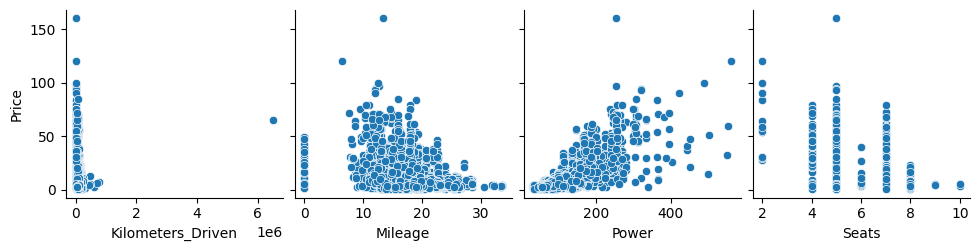

In [ ]:
sns.pairplot(data=train_df, x_vars=['Kilometers_Driven', 'Mileage', 'Power', 'Seats'], y_vars='Price')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = train_df['Price']
X = train_df.drop('Price', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', ' ', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual, color):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)  # 인덱스번호는 안보이게

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color=color)
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    # plt.axhline(y=0.5, color='blue', linestyle='--')  # 0.5를 기준으로 선 추가
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual, color):
    global predictions
    global colors

    plot_predictions(name_, pred, actual, color)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 1
    max_ = df['mse'].max() + 1

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

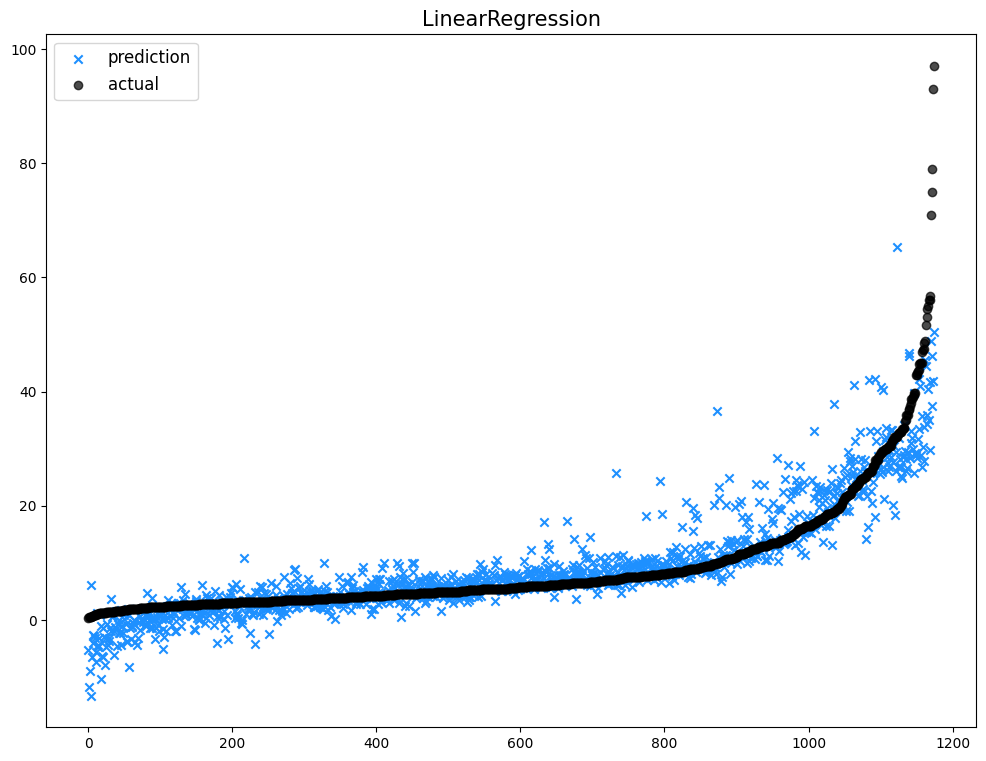

              model        mse
0  LinearRegression  25.231901


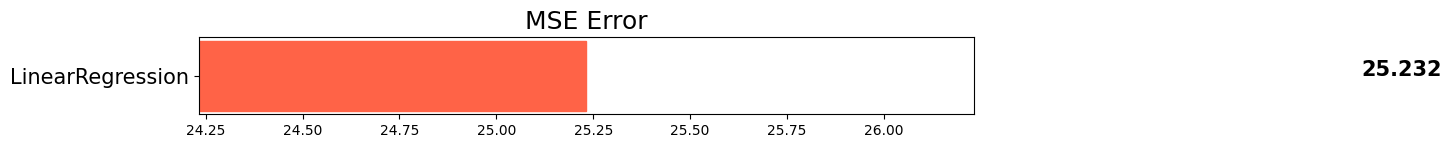

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
mse_eval('LinearRegression', lr_pred, y_test, 'dodgerblue')

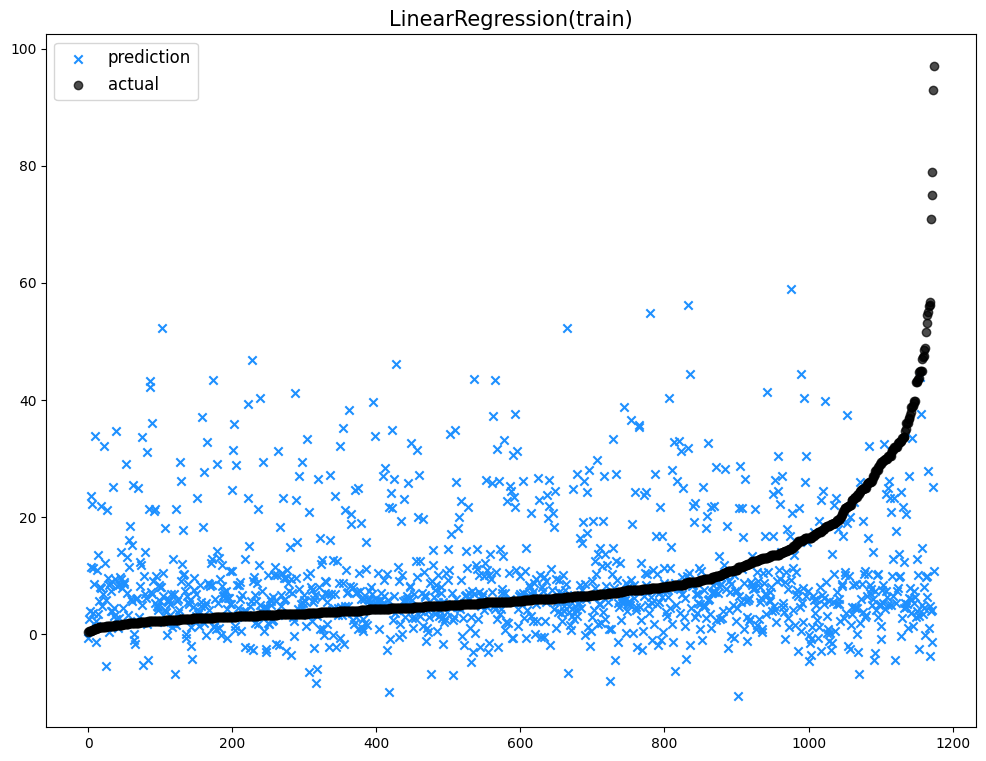

                     model         mse
0  LinearRegression(train)  212.221737
1         LinearRegression   25.231901


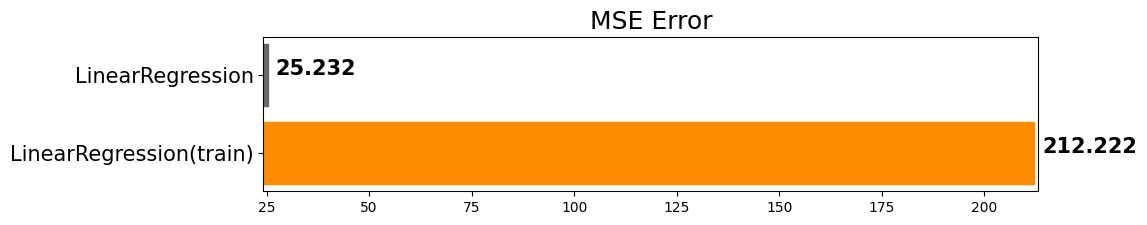

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred2 = lr.predict(X_train[:1175])
mse_eval('LinearRegression(train)', lr_pred2, y_test, 'dodgerblue')

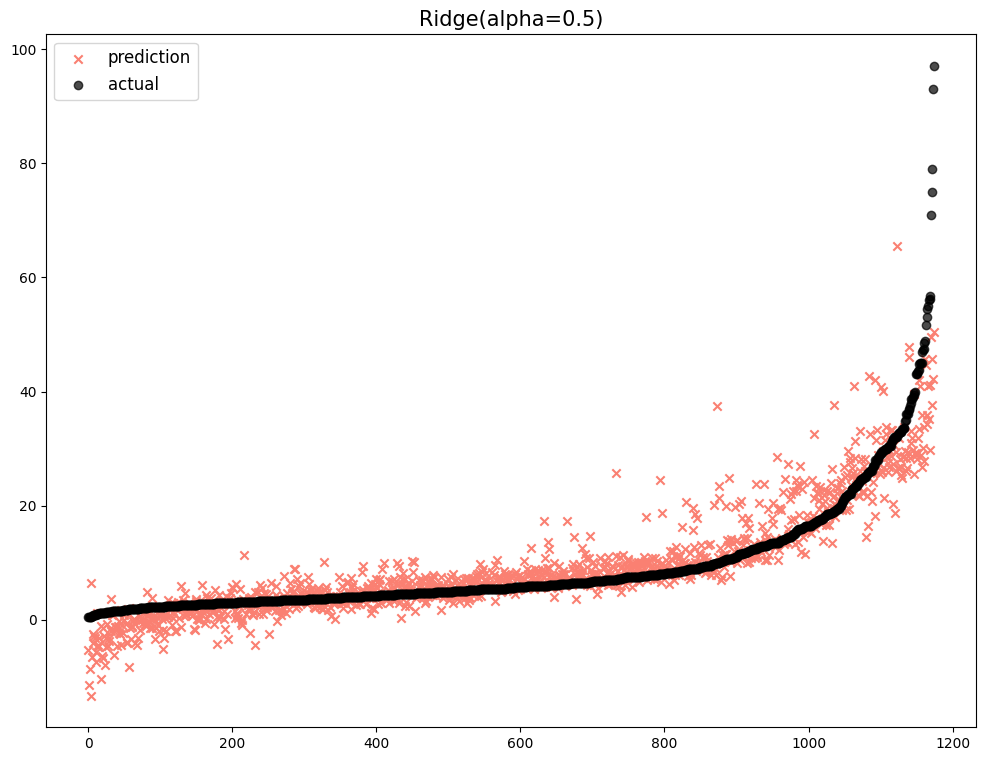

                     model         mse
0  LinearRegression(train)  212.221737
1         Ridge(alpha=0.5)   25.327612
2         LinearRegression   25.231901


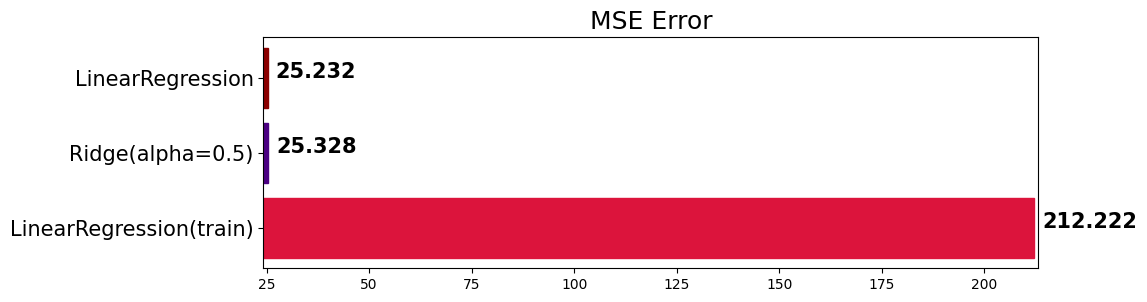

In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse_eval('Ridge(alpha=0.5)', ridge_pred, y_test, 'salmon')

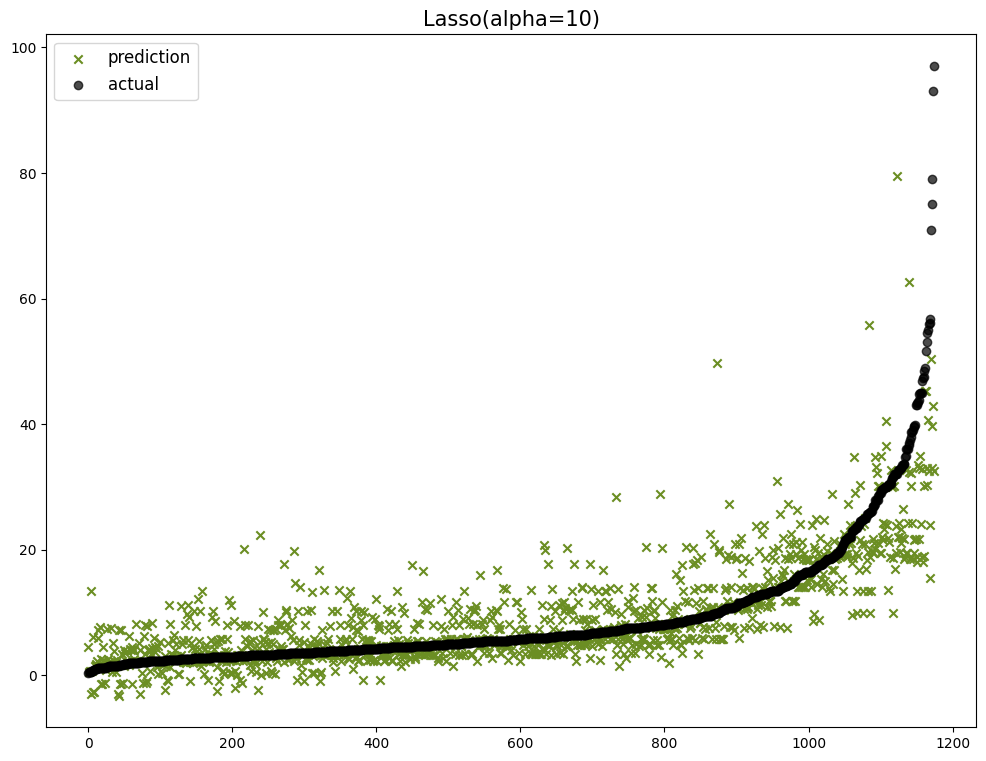

                     model         mse
0  LinearRegression(train)  212.221737
1          Lasso(alpha=10)   45.473423
2         Ridge(alpha=0.5)   25.327612
3         LinearRegression   25.231901


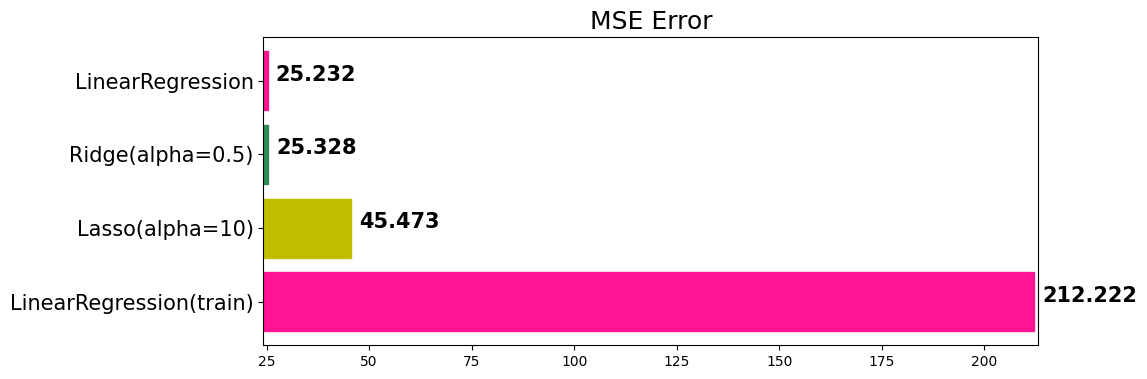

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse_eval('Lasso(alpha=0.1)', lasso_pred, y_test, 'olivedrab')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.747e+04, tolerance: 6.136e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


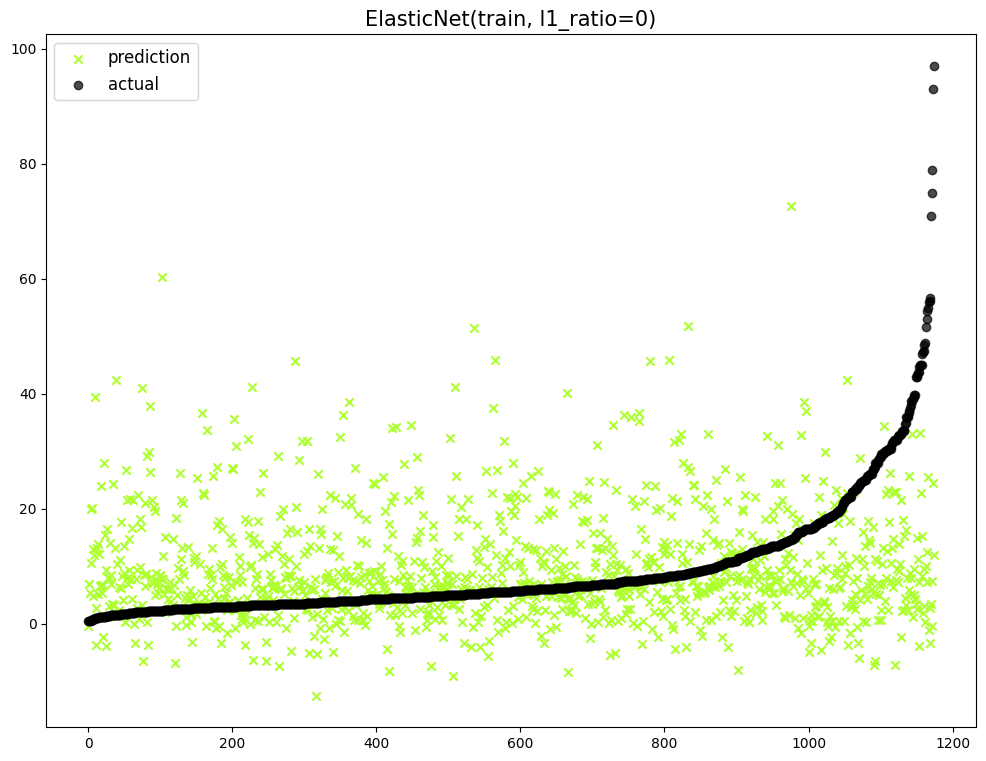

                           model         mse
0        LinearRegression(train)  212.221737
1  ElasticNet(train, l1_ratio=0)  204.148248
2                Lasso(alpha=10)   45.473423
3               Ridge(alpha=0.5)   25.327612
4               LinearRegression   25.231901


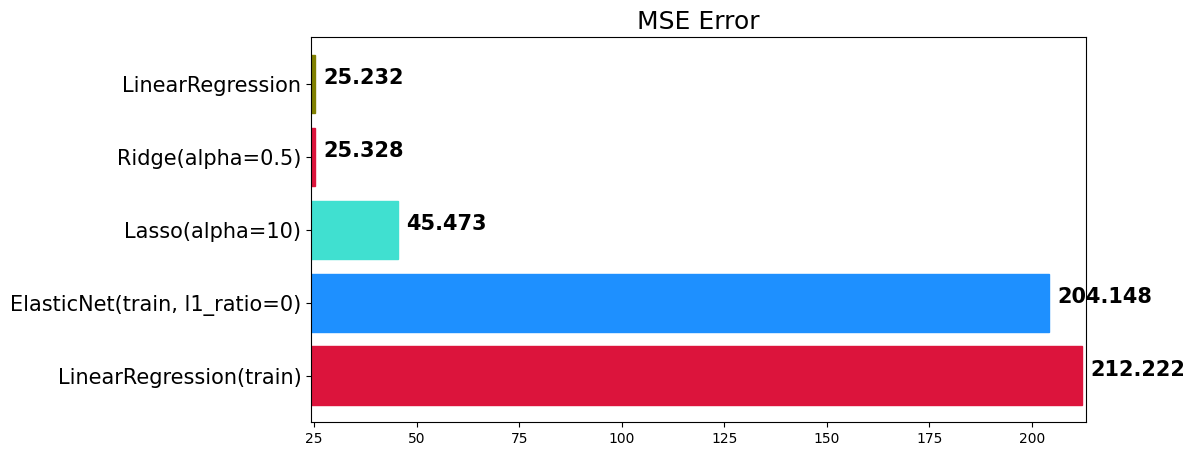

In [ ]:
elasticnet = ElasticNet(l1_ratio=0)
elasticnet.fit(X_train, y_train)
elasticnet_pred2 = elasticnet.predict(X_train[:1175])
mse_eval('ElasticNet(train, l1_ration=0)', elasticnet_pred2, y_test, 'greenyellow')

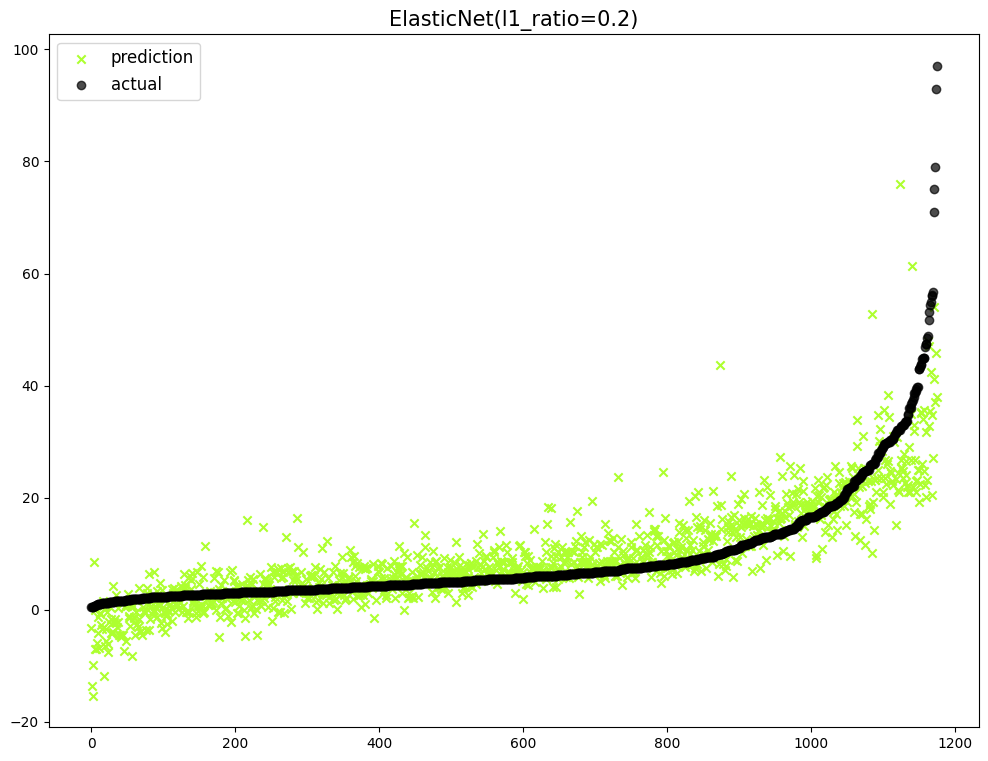

                            model         mse
0         LinearRegression(train)  212.221737
1   ElasticNet(train, l1_ratio=0)  204.148248
2                 Lasso(alpha=10)   45.473423
3        ElasticNet(l1_ratio=0.2)   36.070288
4        ElasticNet(l1_ratio=0.1)   35.554016
5          ElasticNet(l1_ratio=0)   34.981853
6                Ridge(alpha=0.5)   25.327612
7                LinearRegression   25.231901
8             Standard ElasticNet   24.941933
9                 Poly ElasticNet   17.506893
10              Stacking Ensemble    8.696287
11              Weighted Blending    7.703259
12                   RandomForest    6.764065


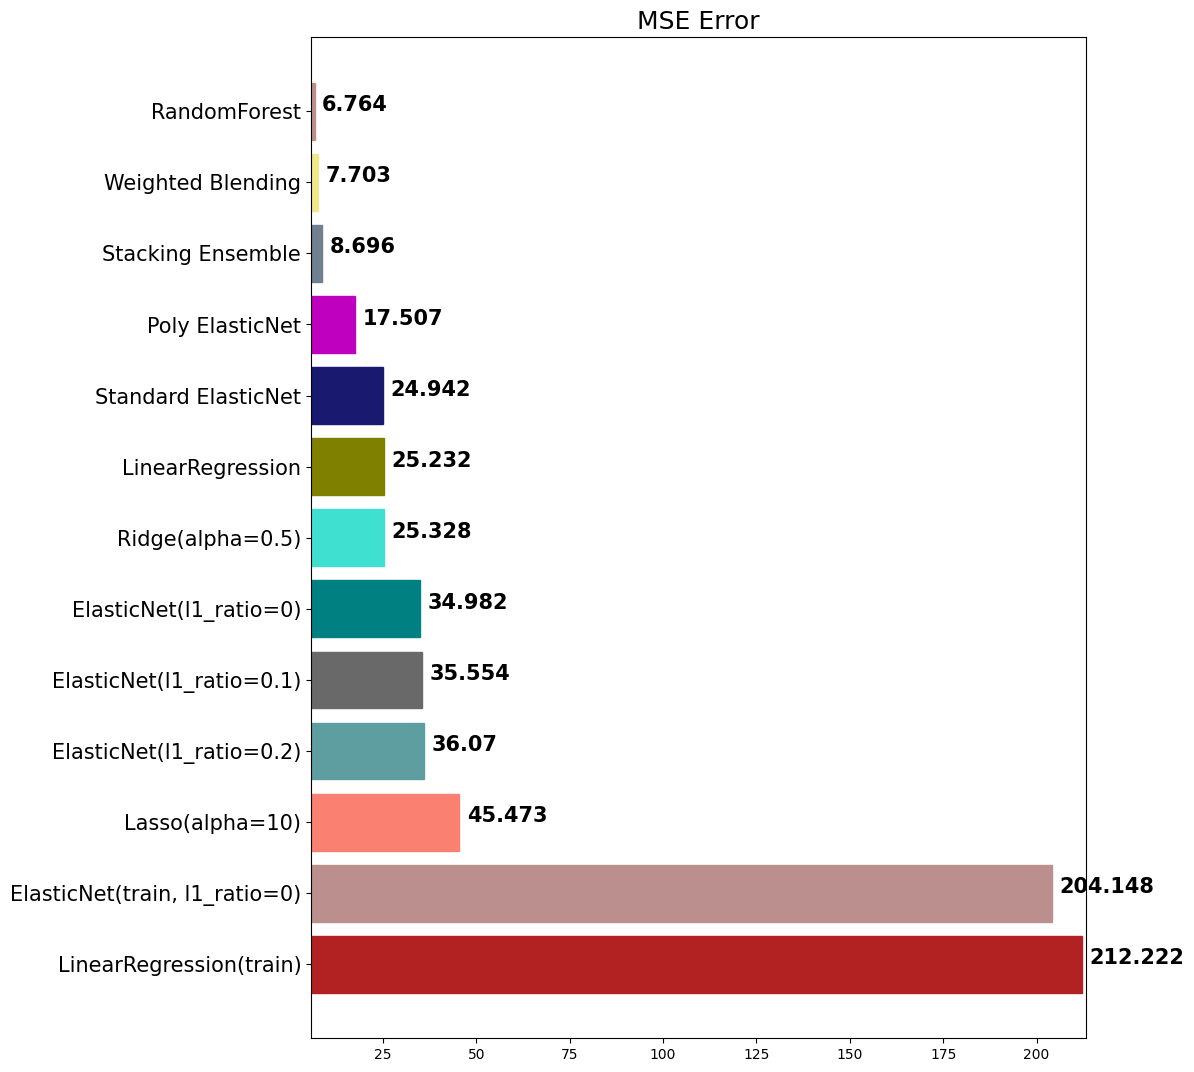

In [ ]:
elasticnet = ElasticNet(l1_ratio=0.2)
elasticnet.fit(X_train, y_train)
elasticnet_pred = elasticnet.predict(X_test)
mse_eval('ElasticNet(l1_ratio=0.2)', elasticnet_pred, y_test, 'greenyellow')

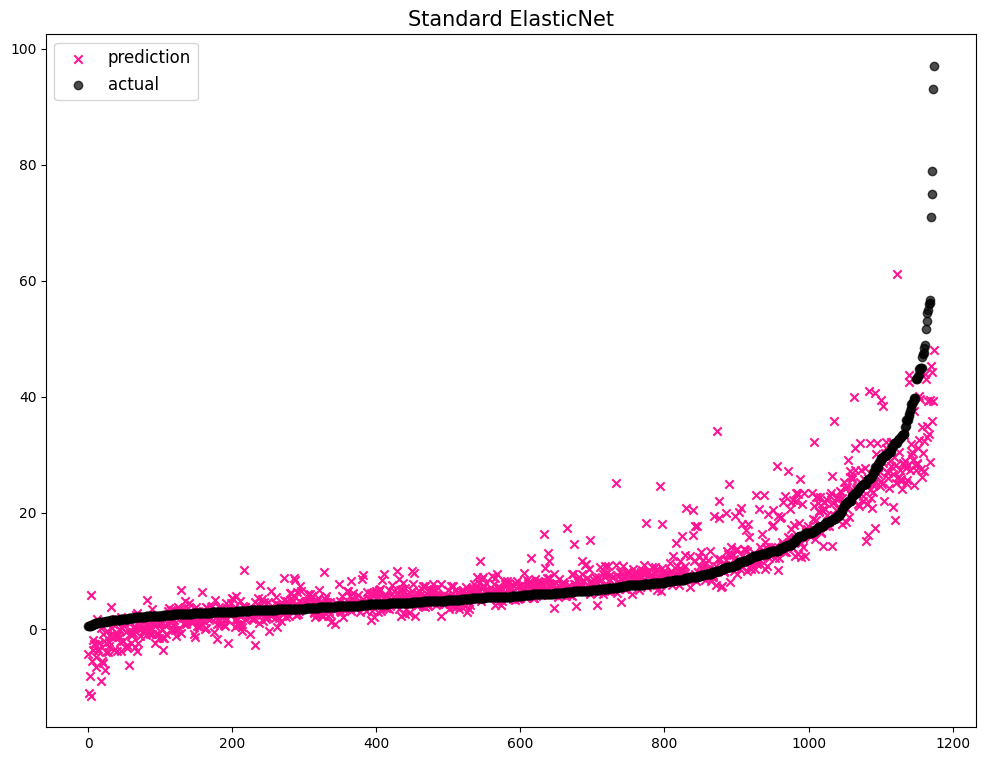

                           model         mse
0        LinearRegression(train)  212.221737
1  ElasticNet(train, l1_ratio=0)  204.148248
2                Lasso(alpha=10)   45.473423
3         ElasticNet(l1_ratio=0)   34.981853
4               Ridge(alpha=0.5)   25.327612
5               LinearRegression   25.231901
6            Standard ElasticNet   24.941933


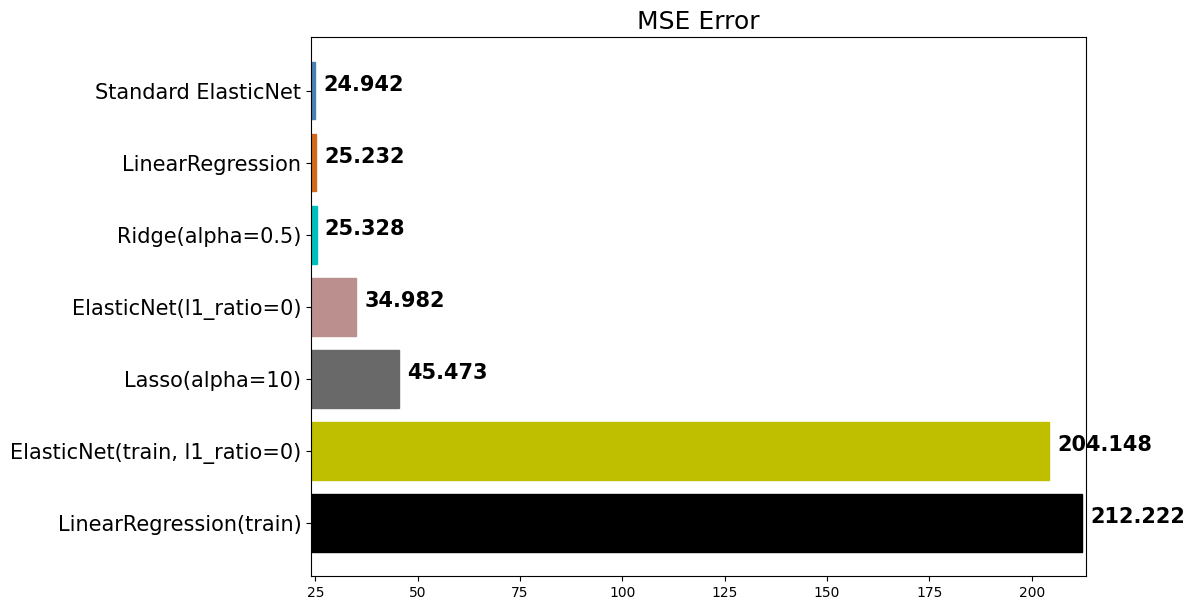

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_scaled_pred = elasticnet_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('Standard ElasticNet', elasticnet_scaled_pred, y_test, 'deeppink')


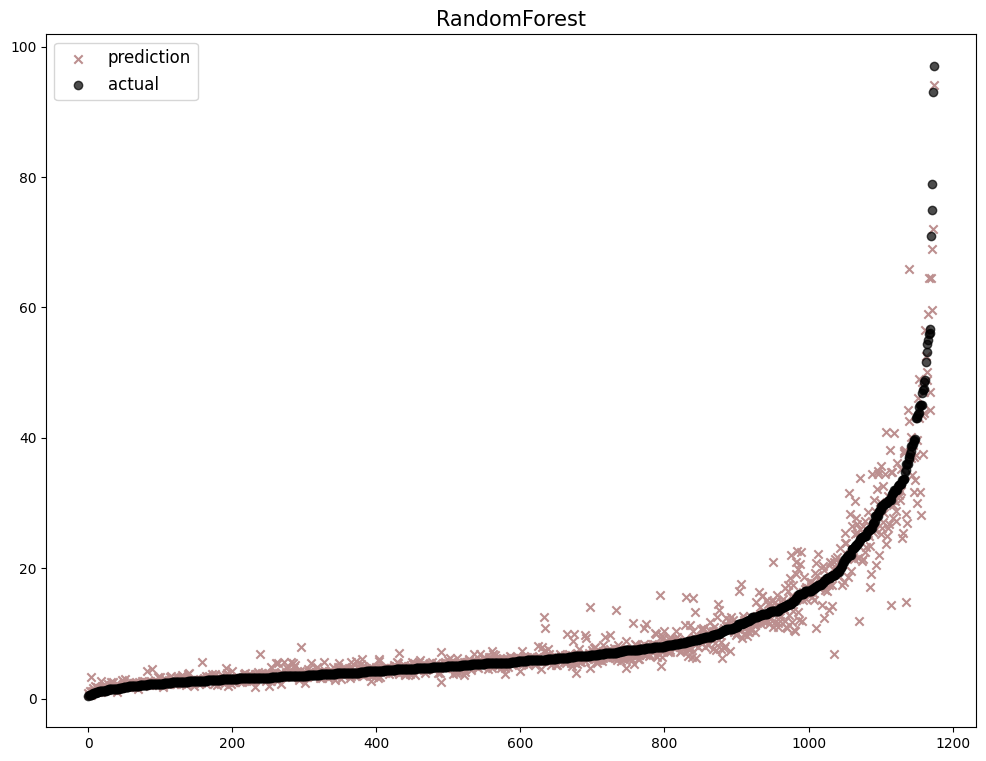

                           model         mse
0        LinearRegression(train)  212.221737
1  ElasticNet(train, l1_ratio=0)  204.148248
2                Lasso(alpha=10)   45.473423
3         ElasticNet(l1_ratio=0)   34.981853
4               Ridge(alpha=0.5)   25.327612
5               LinearRegression   25.231901
6            Standard ElasticNet   24.941933
7                   RandomForest    6.764065


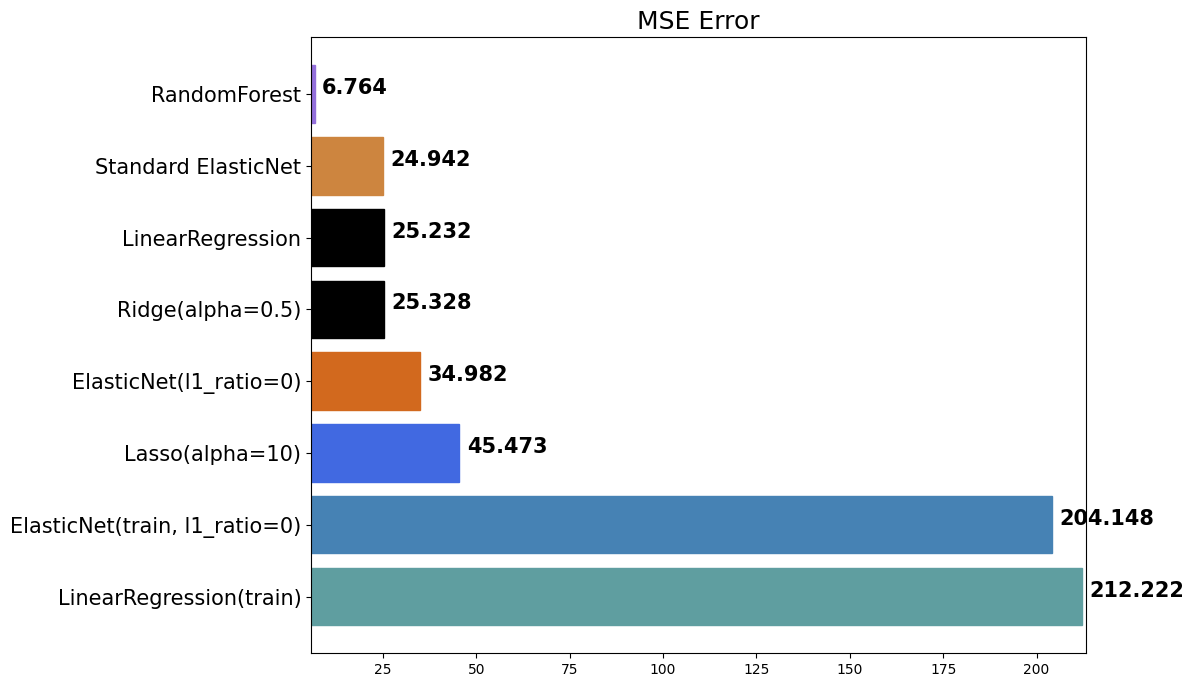

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mse_eval('RandomForest', rf_pred, y_test, 'rosybrown')


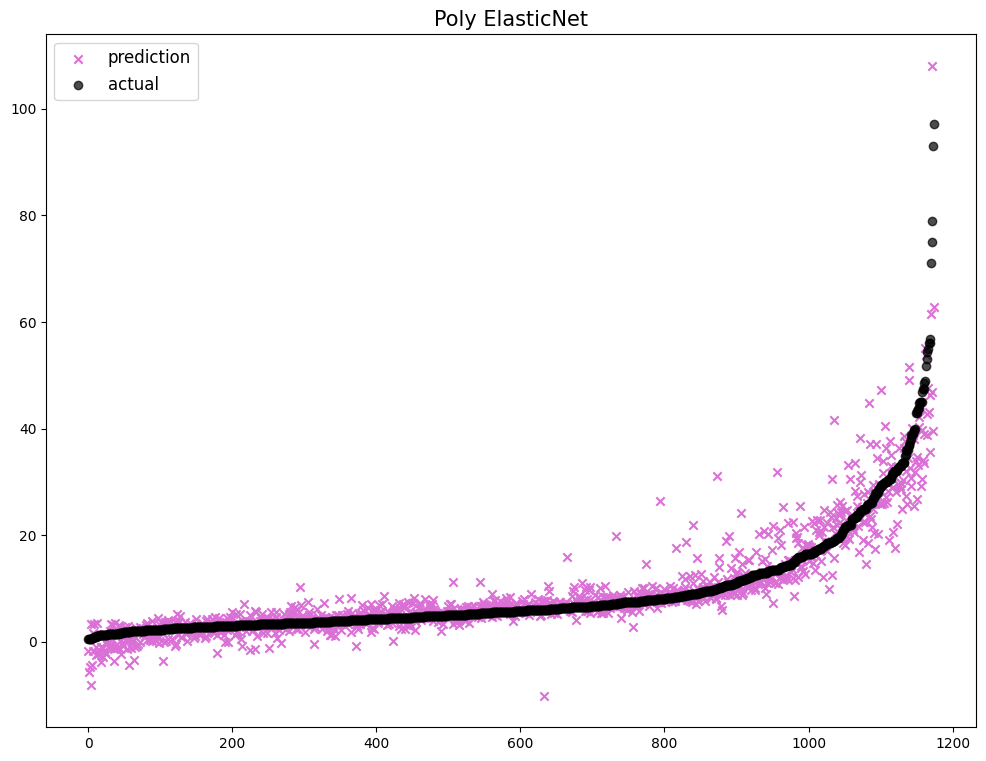

                           model         mse
0        LinearRegression(train)  212.221737
1  ElasticNet(train, l1_ratio=0)  204.148248
2                Lasso(alpha=10)   45.473423
3         ElasticNet(l1_ratio=0)   34.981853
4               Ridge(alpha=0.5)   25.327612
5               LinearRegression   25.231901
6            Standard ElasticNet   24.941933
7                Poly ElasticNet   17.506893
8                   RandomForest    6.764065


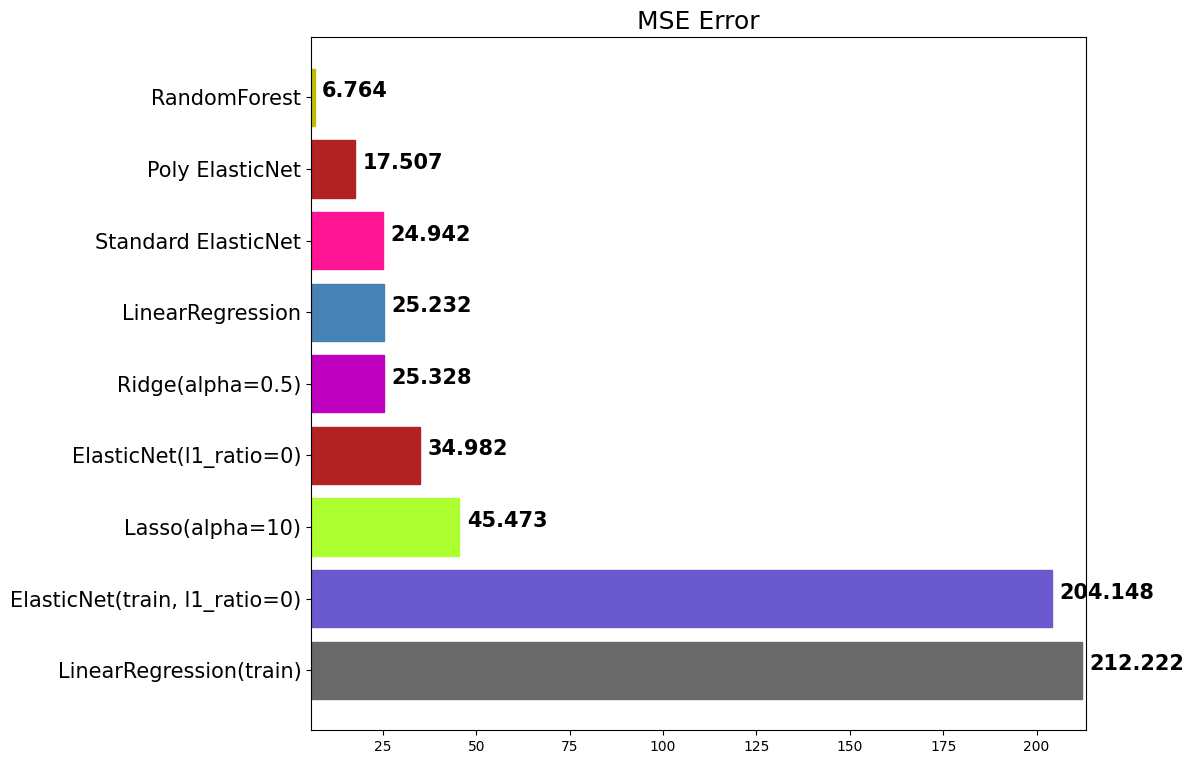

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('Poly ElasticNet', poly_pred, y_test, 'orchid')


In [ ]:
best_feature = sorted(rf.feature_importances_, reverse=False)[:10]

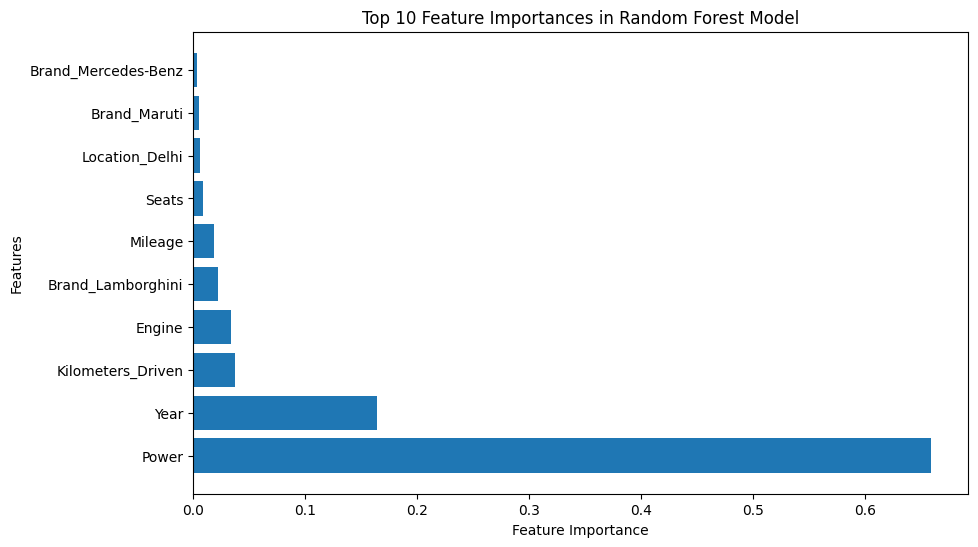

In [ ]:
# 중요도와 컬럼 이름을 매핑한 딕셔너리 생성
importance_dict = {feature: importance for feature, importance in zip(train_df.columns, rf.feature_importances_)}

# 중요도 기준 내림차순으로 정렬하여 상위 10개의 컬럼 선택
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# 컬럼 이름과 중요도 추출
labels, importances = zip(*top_features)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(labels)), importances, align='center')
plt.yticks(range(len(labels)), labels)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
stack_models=[
    ('ploy_elasticnet', poly_pipeline),
    ('randomforest', rf),
    ('elasticnet_pipeline',elasticnet_pipeline),
    ('elasticnet',elasticnet),
    ('linear_reg',lr),
    ('Ridge', ridge),
    ('Lasso', lasso)
]

In [ ]:
stack_reg = StackingRegressor(stack_models, final_estimator=rf, n_jobs=-1)

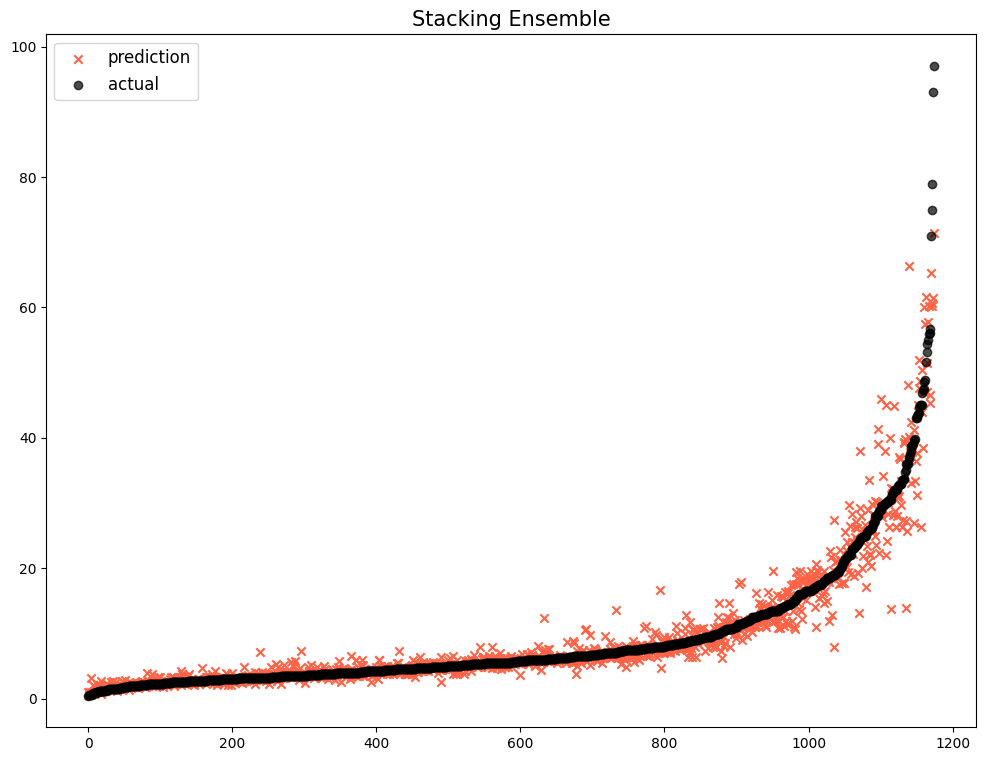

                           model         mse
0        LinearRegression(train)  212.221737
1  ElasticNet(train, l1_ratio=0)  204.148248
2                Lasso(alpha=10)   45.473423
3         ElasticNet(l1_ratio=0)   34.981853
4               Ridge(alpha=0.5)   25.327612
5               LinearRegression   25.231901
6            Standard ElasticNet   24.941933
7                Poly ElasticNet   17.506893
8              Stacking Ensemble    8.696287
9                   RandomForest    6.764065


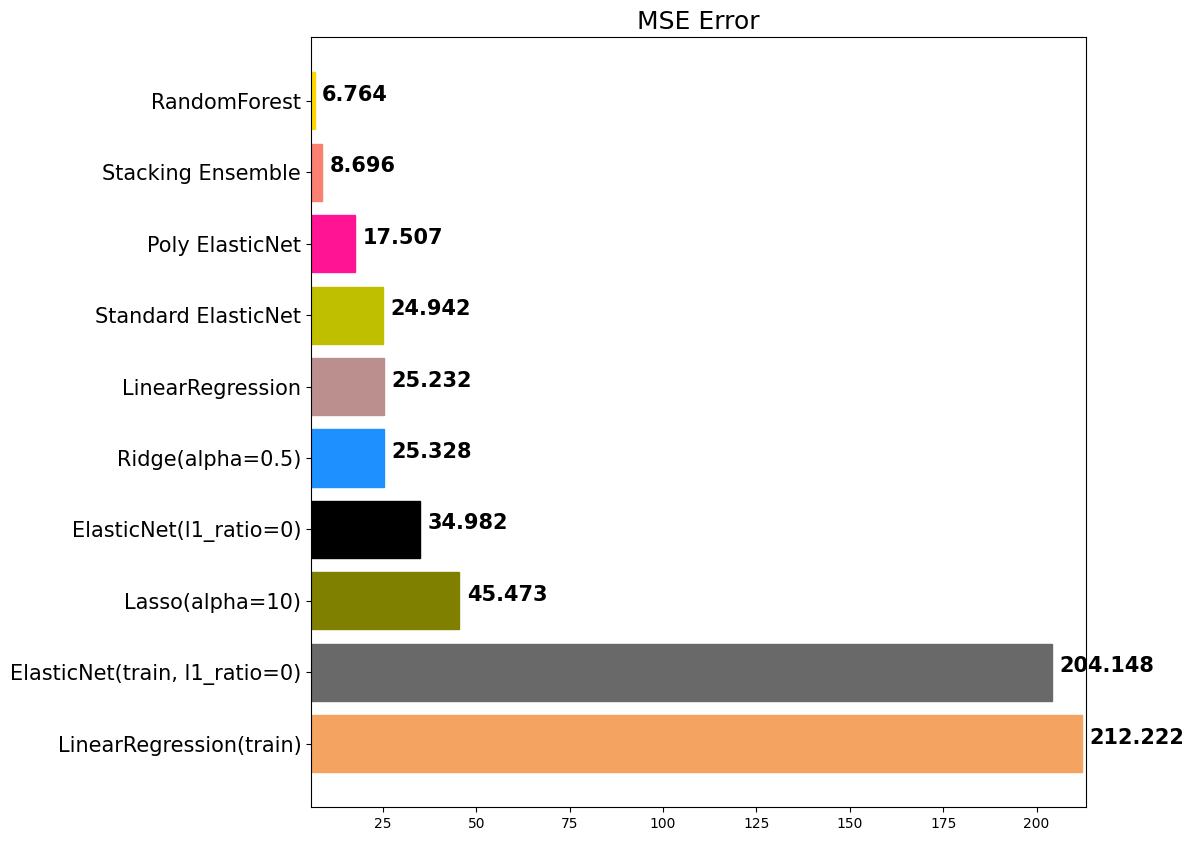

In [ ]:
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)
mse_eval('Stacking Ensemble', stack_pred, y_test, 'tomato')

In [ ]:
final_outputs = {
    'poly_elasticnet': poly_pred,
    'randomforest': rf_pred,
    'stacking': stack_pred,
    'elasticnet_pipeline': elasticnet_pred,
    'linear_reg':lr_pred
}

In [ ]:
final_prediction=\
final_outputs['poly_elasticnet'] * 0.1\
+ final_outputs['randomforest'] * 0.5\
+ final_outputs['stacking'] * 0.2\
+ final_outputs['elasticnet_pipeline'] * 0.05\
+ final_outputs['linear_reg'] * 0.15


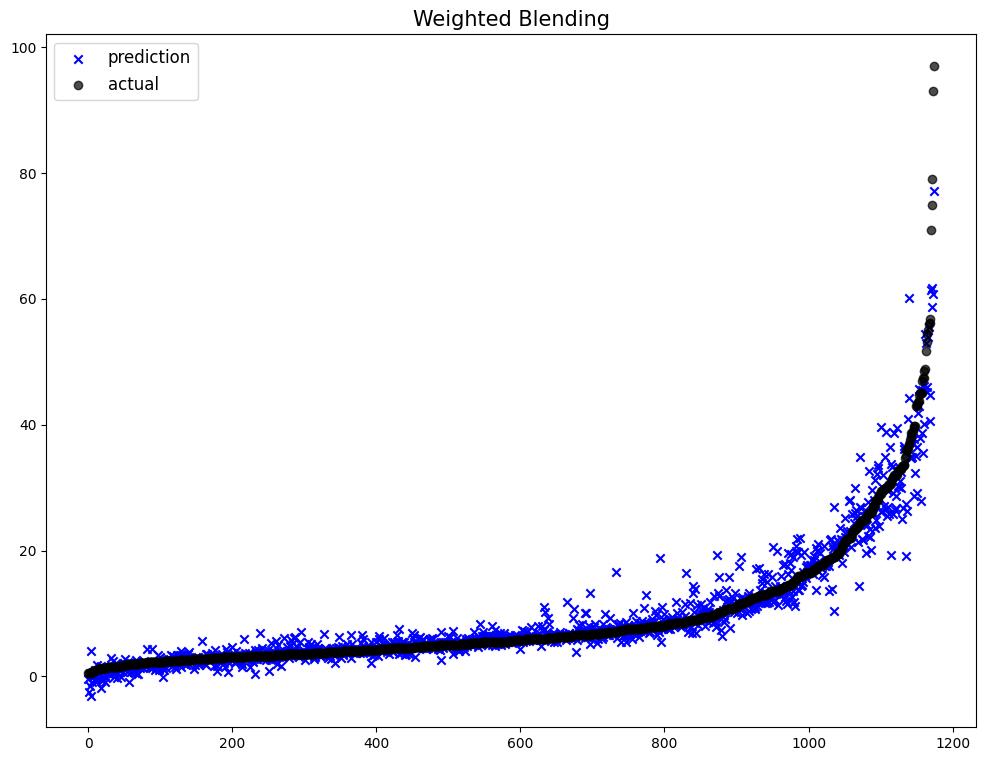

                            model         mse
0         LinearRegression(train)  212.221737
1   ElasticNet(train, l1_ratio=0)  204.148248
2                 Lasso(alpha=10)   45.473423
3          ElasticNet(l1_ratio=0)   34.981853
4                Ridge(alpha=0.5)   25.327612
5                LinearRegression   25.231901
6             Standard ElasticNet   24.941933
7                 Poly ElasticNet   17.506893
8               Stacking Ensemble    8.696287
9               Weighted Blending    7.703259
10                   RandomForest    6.764065


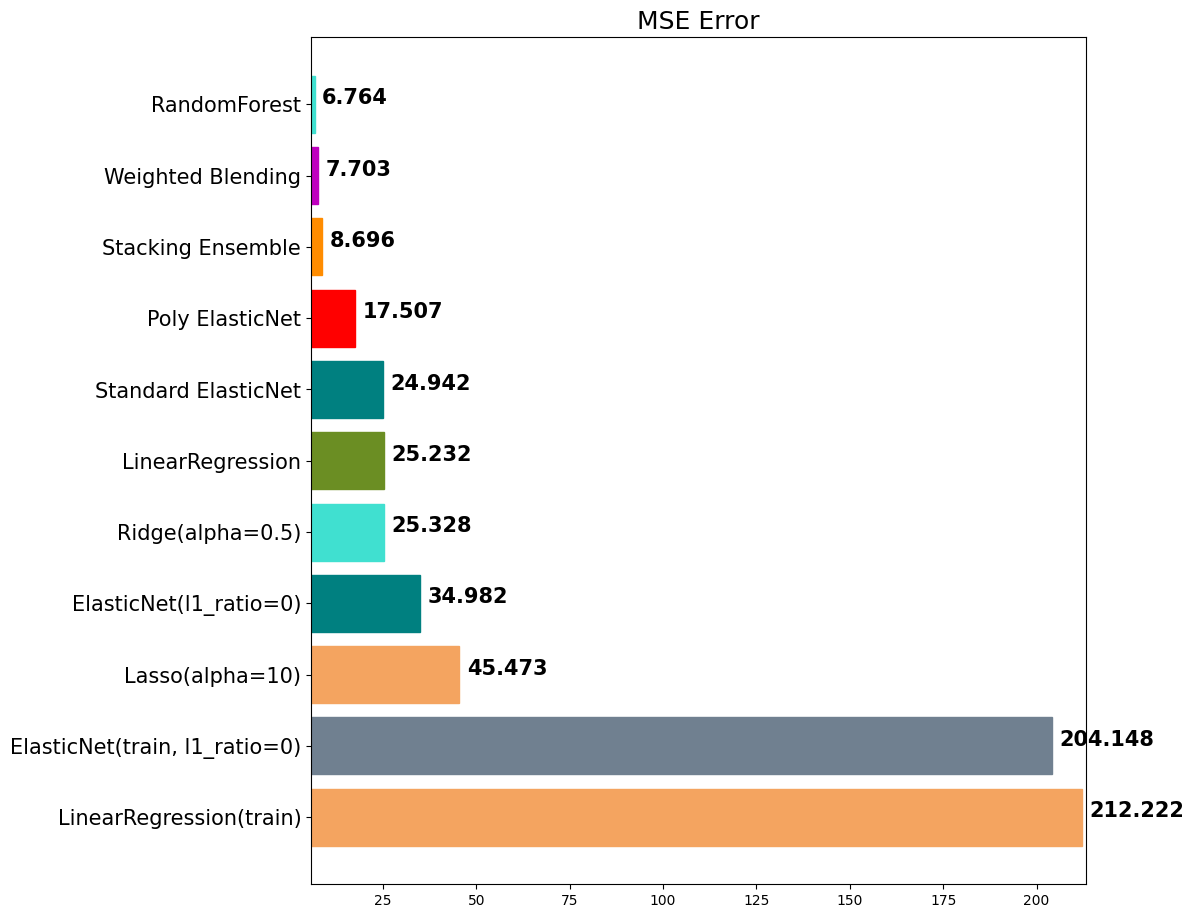

In [ ]:
mse_eval('Weighted Blending', final_prediction, y_test, 'b')